# Housing Exploratory Data Analysis

In [145]:
# importing needed libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [146]:
df = pd.read_csv(r"C:\Users\willm\Desktop\housing_project\cleaning\cleaned_housing_data.csv")
df

,id,address,city,beds,baths,price,status,square_feet,acres,year_built,days_on_market,property_type,hoa_per_month,url
0,1,Tbd Lake Lndg,Abingdon,0.0,0.0,299000,Active,0,1.58,0,46,Land,29,https://www.redfin.com/VA/Unknown/Tbd-Lake-Lnd...
1,2,000 James St,Bluefield,0.0,0.0,31500,Active,0,1.36,0,41,Land,0,https://www.redfin.com/VA/Bluefield/James-St-2...
2,3,Tbd Bridgeview Dr,Abingdon,0.0,0.0,70000,Active,0,0.50,0,354,Land,0,https://www.redfin.com/VA/Unknown/Tbd-Bridgevi...
3,4,0 Tyler St,Abbs Valley,0.0,0.0,25000,Active,0,0.00,0,41,Land,0,https://www.redfin.com/VA/Abbs-Valley/Tyler-St...
4,5,19510 Wynscape Dr,Abingdon,3.0,2.5,470000,Active,2216,0.45,2006,7,Single Family,0,https://www.redfin.com/VA/Abingdon/19510-Wynsc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24244,24245,146 Broomsedge Ln,Winchester,3.0,2.5,689000,Active,1800,5.20,2025,111,Single Family,0,https://www.redfin.com/VA/Winchester/146-Broom...
24245,24246,482 Diamondback Ln,Winchester,3.0,2.0,395000,Active,880,10.38,2019,111,Single Family,0,https://www.redfin.com/VA/Winchester/482-Diamo...
24246,24247,520 Highland Ave,Winchester,0.0,0.0,120000,Active,0,0.12,0,120,Land,0,https://www.redfin.com/VA/Winchester/520-Highl...
24247,24248,Wardensville Grade Lot 4,Winchester,0.0,0.0,1500000,Active,0,140.54,0,124,Land,0,https://www.redfin.com/VA/Winchester/Wardensvi...


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24249 entries, 0 to 24248
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              24249 non-null  int64  
 1   address         24248 non-null  object 
 2   city            24245 non-null  object 
 3   beds            24249 non-null  float64
 4   baths           24249 non-null  float64
 5   price           24249 non-null  int64  
 6   status          24249 non-null  object 
 7   square_feet     24249 non-null  int64  
 8   acres           24249 non-null  float64
 9   year_built      24249 non-null  int64  
 10  days_on_market  24249 non-null  int64  
 11  property_type   24249 non-null  object 
 12  hoa_per_month   24249 non-null  int64  
 13  url             24249 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.6+ MB


In [148]:
df.describe()

,id,beds,baths,price,square_feet,acres,year_built,days_on_market,hoa_per_month
count,24249.000000,24249.000000,24249.000000,2.424900e+04,24249.000000,24249.000000,24249.000000,24249.000000,24249.000000
mean,12125.000000,2.761557,2.153041,6.622089e+05,1972.790094,6.274300,1372.963256,121.102767,81.679657
std,7000.227675,1.874499,1.654739,1.129283e+06,5823.642288,138.203239,917.879794,213.446262,327.117916
min,1.000000,0.000000,0.000000,1.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6063.000000,2.000000,1.000000,2.400000e+05,767.000000,0.000000,0.000000,18.000000,0.000000
50%,12125.000000,3.000000,2.000000,4.250000e+05,1689.000000,0.250000,1968.000000,46.000000,0.000000
75%,18187.000000,4.000000,3.000000,7.150000e+05,2634.000000,1.000000,2005.000000,124.000000,71.000000
max,24249.000000,44.000000,40.000000,6.000000e+07,861617.000000,20001.000000,2026.000000,4134.000000,40758.000000


In [149]:
# dont actually need the id column so I am dropping it here
df = df.drop(columns='id')

In [150]:
# checking if zero vazlues were just converted from null in csv conversion
print((df[['beds', 'baths', 'square_feet', 'acres']] == 0).sum())

beds           5464
baths          5454
square_feet    5456
acres          6378
dtype: int64


In [151]:
# convert those 0 values (which technically are nulls) back to null values and then check
cols_to_convert = ['beds', 'baths', 'square_feet', 'acres','year_built']
df[cols_to_convert] = df[cols_to_convert].replace(0, np.nan)
print(df[cols_to_convert].isnull().sum())


beds           5464
baths          5454
square_feet    5456
acres          6378
year_built     7484
dtype: int64


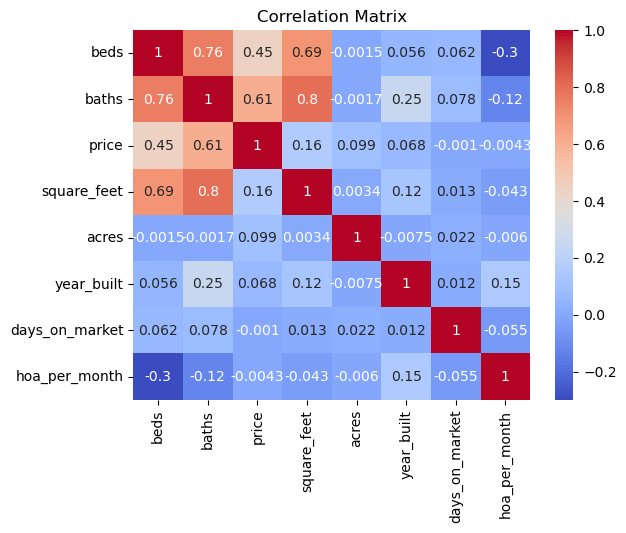

In [152]:
# correlation matrix for basic understanding of which values have most similarity 
matrix_cols = ['beds', 'baths', 'price', 'square_feet', 'acres', 'year_built', 'days_on_market', 'hoa_per_month']
df[matrix_cols] = df[matrix_cols].astype(float)
sns.heatmap(df[matrix_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

25.945599999977276

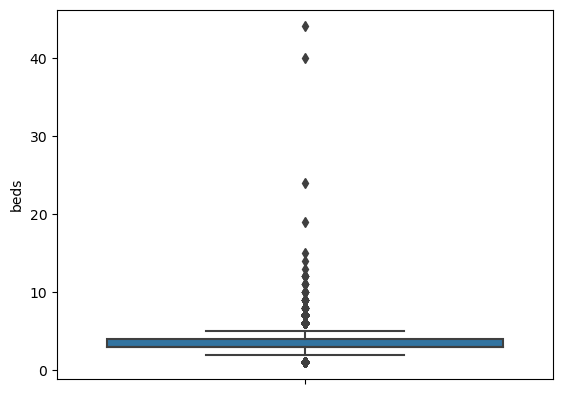

In [153]:
# checking for outliers on numerical columns to try and smooth out matrix and make it more accurate based on the analysis i am wanting to perform
sns.boxplot(y = "beds",data=df)
bed_upper_limit = df['beds'].quantile(.9999)
bed_upper_limit

<Axes: ylabel='beds'>

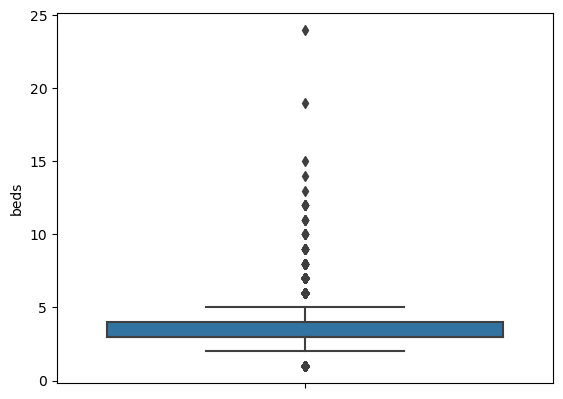

In [154]:
# cutting off upper limit on beds to avoid crazy outliers that dont line with purpose of analysis
df = df[df["beds"] <= bed_upper_limit] # smoothed out boxplot and made it more visible
sns.boxplot(y="beds", data=df)



In [155]:
# find all upper limit values of price to see discrepancies
df["price"].sort_values(ascending=False).head(10)

900      60000000.0
14471    34995000.0
14431    22500000.0
14437    22220000.0
8256     18500000.0
22845    16500000.0
14528    15990000.0
14464    15990000.0
14416    15900000.0
14481    15000000.0
Name: price, dtype: float64

10421800.000000076

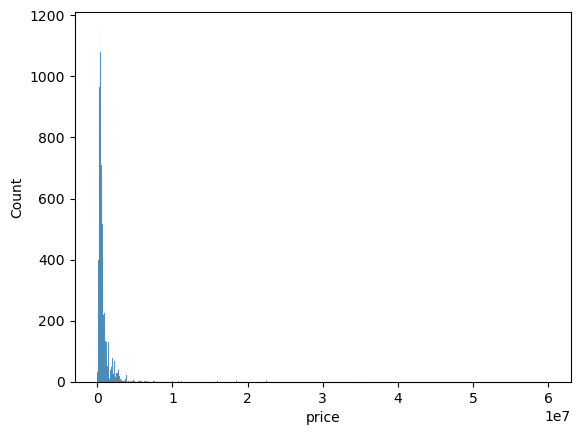

In [156]:
# checking price outliers and setting upper limit ~ $10,100,00 
sns.histplot(x = "price",data = df)
price_upper_limit = df["price"].quantile(0.999)
price_upper_limit

<Axes: xlabel='price', ylabel='Count'>

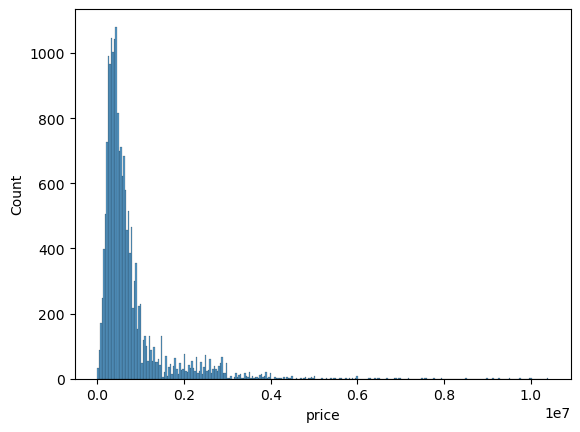

In [157]:
# removing upper limit values and then re-checking distribution
df = df[df['price'] <= price_upper_limit] # still alloting higher priced housing without extreme-case prices
sns.histplot(x = "price",data= df)